In [5]:
print("Running")

Running


In [7]:
import pandas as pd

In [3]:
import pandas as pd

# Example: Creating a DataFrame
data = {'Column1': [1, 2, 3], 'Column2': [4, 5, 6]}
df = pd.DataFrame(data)


In [6]:
df =pd.read_csv("pcos_dataset.csv")

 # Data Cleaning

info how many column and row

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

### We want to read all data

In [13]:
df = pd.DataFrame(df)

In [14]:
df.head()

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No


### Check column to avoid error

In [15]:
column = list(df.columns)
column

['Country',
 'Age',
 'BMI',
 'Menstrual Regularity',
 'Hirsutism',
 'Acne Severity',
 'Family History of PCOS',
 'Insulin Resistance',
 'Lifestyle Score',
 'Stress Levels',
 'Urban/Rural',
 'Socioeconomic Status',
 'Awareness of PCOS',
 'Fertility Concerns',
 'Undiagnosed PCOS Likelihood',
 'Ethnicity',
 'Diagnosis']

### drop column that isnot needed

In [62]:
df.drop(columns='Country', inplace=True)  


### check n/a values

In [18]:
df.isna().sum()

Country                            0
Age                                0
BMI                                0
Menstrual Regularity               0
Hirsutism                          0
Acne Severity                  60085
Family History of PCOS             0
Insulin Resistance                 0
Lifestyle Score                    0
Stress Levels                      0
Urban/Rural                        0
Socioeconomic Status               0
Awareness of PCOS                  0
Fertility Concerns                 0
Undiagnosed PCOS Likelihood        0
Ethnicity                          0
Diagnosis                          0
dtype: int64

### dropping n/a values and check again

In [57]:
df  =df.dropna(subset=["Country"])

In [20]:
df.isna().sum()

Country                            0
Age                                0
BMI                                0
Menstrual Regularity               0
Hirsutism                          0
Acne Severity                  60085
Family History of PCOS             0
Insulin Resistance                 0
Lifestyle Score                    0
Stress Levels                      0
Urban/Rural                        0
Socioeconomic Status               0
Awareness of PCOS                  0
Fertility Concerns                 0
Undiagnosed PCOS Likelihood        0
Ethnicity                          0
Diagnosis                          0
dtype: int64

### Check duplicate

In [56]:
df.duplicated('Country').sum()

0

### Drop duplicate

In [55]:
df.drop_duplicates(subset='Country',inplace=True)
df.duplicated('Country').sum()

0

### Again duplicate

In [60]:
df.duplicated('Country').sum()

0

### Description

In [61]:
df.describe()

,Age,Lifestyle Score,Undiagnosed PCOS Likelihood
count,77.000000,77.000000,77.000000
mean,30.896104,5.324675,0.149668
std,9.621227,2.935453,0.056400
min,15.000000,1.000000,0.051223
25%,23.000000,3.000000,0.103628
50%,31.000000,5.000000,0.153256
75%,38.000000,8.000000,0.193170
max,49.000000,10.000000,0.246079


### If you want to seprate thing by commas

In [67]:
df['BMI'].str.split(',',expand=True)

,0
0,Overweight
1,Underweight
2,Normal
3,Normal
4,Overweight
...,...
201,Obese
214,Obese
239,Overweight
284,Normal


### Data agregation

# Applying aggregation across all the columns 

In [75]:

numeric_df = df.select_dtypes(include=['number'])
numeric_df.aggregate(['sum', 'min'])

,Age,Lifestyle Score,Undiagnosed PCOS Likelihood
sum,2379,410,11.524465
min,15,1,0.051223


## We are going to find aggregation for these columns 
This function lets you perform several calculations at once, like getting the total, average, and maximum of a column in one go.

In [77]:

df.aggregate({"Age": ['sum', 'min'], 
              "Undiagnosed PCOS Likelihood": ['max', 'min'], 
             }) 

,Age,Undiagnosed PCOS Likelihood
sum,2379.0,NaN
min,15.0,0.051223
max,NaN,0.246079


## Common Aggregations with groupby():
Think of it like sorting your data into groups (e.g., by city) and then calculating things like totals or averages for each group.

In [80]:
df.groupby('Ethnicity').agg({'Age': ['sum', 'mean', 'max', 'min']})


Age                   
           sum       mean max min
Ethnicity                        
African    443  27.687500  46  15
Asian      336  37.333333  47  20
Caucasian  521  32.562500  47  18
Hispanic   503  29.588235  49  18
Other      576  30.315789  49  15

## Used to summarize and aggregate data with multiple dimensions.
It’s like an Excel pivot table. You can reorganize your data to show summaries by different Ethnicity and calculations.

In [82]:
df.pivot_table(values='Age', index='Ethnicity', aggfunc='sum')

,Age
Ethnicity,
African,443
Asian,336
Caucasian,521
Hispanic,503
Other,576


## apply() – Custom Aggregation Function
Allows applying custom functions to each group.
Lets you write your own function to apply on each row or group of data.

In [84]:
df.groupby('Ethnicity')['Age'].apply(lambda x: x.max() - x.min())


Ethnicity
African      31
Asian        27
Caucasian    29
Hispanic     31
Other        34
Name: Age, dtype: int64

## sum() – Add up values
Adds up all the numbers in a column.

In [86]:
df['Age'].sum()


2379

## mean() – Calculating Average
Finds the average of a numerical column.

In [88]:
df['Age'].mean()

30.896103896103895

## count() – Counting Rows
Counts the number of non-null values.

In [90]:
df['Age'].count()

77

 ## median() – Median Value
Calculates the median (middle value) of a column.

In [92]:
df['Age'].median()

31.0

##  std() – Standard Deviation
Computes the standard deviation of a numerical column.

In [94]:
df['Age'].std()

9.621227101385351

## nunique() – Counting Unique Values
Finds the number of unique values in a column.

In [96]:
df['Ethnicity'].nunique()

5

## data preprocessing
## Handling Missing Values
Yes() / No() – Check for missing values

In [97]:
df.isnull().sum() 

Age                             0
BMI                             0
Menstrual Regularity            0
Hirsutism                       0
Acne Severity                  43
Family History of PCOS          0
Insulin Resistance              0
Lifestyle Score                 0
Stress Levels                   0
Urban/Rural                     0
Socioeconomic Status            0
Awareness of PCOS               0
Fertility Concerns              0
Undiagnosed PCOS Likelihood     0
Ethnicity                       0
Diagnosis                       0
dtype: int64

### For non missing values

In [99]:
df.isnull().sum() 

Age                             0
BMI                             0
Menstrual Regularity            0
Hirsutism                       0
Acne Severity                  43
Family History of PCOS          0
Insulin Resistance              0
Lifestyle Score                 0
Stress Levels                   0
Urban/Rural                     0
Socioeconomic Status            0
Awareness of PCOS               0
Fertility Concerns              0
Undiagnosed PCOS Likelihood     0
Ethnicity                       0
Diagnosis                       0
dtype: int64

dropna() – Remove missing values
Removes rows or columns with missing values.

Remove rows with any missing value

In [100]:
df.dropna()

,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
2,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
7,38,Normal,Regular,Yes,Mild,No,No,8,Medium,Rural,Middle,No,No,0.205957,Caucasian,No
9,21,Underweight,Irregular,No,Mild,No,No,1,Medium,Rural,Low,Yes,No,0.102774,African,No
10,25,Normal,Irregular,Yes,Moderate,Yes,No,5,Low,Rural,Low,Yes,Yes,0.181860,Asian,No
12,46,Underweight,Regular,No,Mild,No,Yes,1,Medium,Urban,Low,No,Yes,0.232999,Caucasian,No
18,22,Overweight,Regular,Yes,Mild,No,No,6,Medium,Urban,Low,Yes,No,0.061689,Hispanic,No
19,29,Underweight,Regular,No,Moderate,No,No,3,Medium,Rural,Low,Yes,No,0.228870,Hispanic,No
20,31,Overweight,Regular,No,Mild,Yes,No,1,High,Rural,Middle,Yes,No,0.051418,Caucasian,No


### Remove columns with missing values

In [101]:
df.dropna(axis=1)

,Age,BMI,Menstrual Regularity,Hirsutism,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,26,Overweight,Regular,Yes,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,16,Underweight,Regular,Yes,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,41,Normal,Regular,No,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,27,Normal,Irregular,No,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,26,Overweight,Irregular,Yes,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,27,Obese,Regular,No,No,No,10,High,Urban,Low,Yes,No,0.142578,Hispanic,No
214,27,Obese,Regular,No,Yes,Yes,2,Medium,Rural,High,No,No,0.238204,Other,No
239,35,Overweight,Regular,Yes,Yes,Yes,3,Low,Rural,Low,No,No,0.051223,Asian,Yes
284,47,Normal,Regular,Yes,Yes,Yes,7,Medium,Rural,Middle,No,No,0.174532,Asian,No


fillna() – Fill missing values
Fills missing values with a specified value or strategy.

In [102]:
df.fillna(0)  # Replace missing values with 0


,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,16,Underweight,Regular,Yes,0,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,26,Overweight,Irregular,Yes,0,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,27,Obese,Regular,No,Mild,No,No,10,High,Urban,Low,Yes,No,0.142578,Hispanic,No
214,27,Obese,Regular,No,0,Yes,Yes,2,Medium,Rural,High,No,No,0.238204,Other,No
239,35,Overweight,Regular,Yes,0,Yes,Yes,3,Low,Rural,Low,No,No,0.051223,Asian,Yes
284,47,Normal,Regular,Yes,0,Yes,Yes,7,Medium,Rural,Middle,No,No,0.174532,Asian,No


## Handling Duplicates
duplicated() – Identify duplicate rows
Checks for duplicate rows in the DataFrame.

In [103]:
df.duplicated().sum()  # Count duplicate rows

0

In [104]:
df.drop_duplicates()  # Remove duplicate rows


,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,27,Obese,Regular,No,Mild,No,No,10,High,Urban,Low,Yes,No,0.142578,Hispanic,No
214,27,Obese,Regular,No,NaN,Yes,Yes,2,Medium,Rural,High,No,No,0.238204,Other,No
239,35,Overweight,Regular,Yes,NaN,Yes,Yes,3,Low,Rural,Low,No,No,0.051223,Asian,Yes
284,47,Normal,Regular,Yes,NaN,Yes,Yes,7,Medium,Rural,Middle,No,No,0.174532,Asian,No


## Data Transformation
astype() – Convert data types
Converts the data type of columns to a specific type.

In [108]:
# Adding the 'Gender' column with sample data
gender_list = ['Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'] * (len(df) // 10 + 1)
df['Gender'] = gender_list[:len(df)]  # Adjust the length to match the DataFrame

# Convert categorical values to numeric
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

## rename() – Rename columns
Renames column names for better understanding.

In [25]:
df.rename(columns={'Name': 'name'}, inplace=True)


In [26]:
df.rename(columns={'Customer Name': 'name'}, inplace=True)


## Data Encoding
get_dummies() – One-hot encoding
Converts categorical data into dummy variables.

In [33]:
# Adding a 'Country' column with sample data
df['Country'] = ['USA', 'Canada', 'Mexico']

# Applying one-hot encoding to the 'Country' column
pd.get_dummies(df, columns=['Country'])

,Column1,Column2,Sales,Country_Canada,Country_Mexico,Country_USA
0,1,4,35000,False,False,True
1,2,5,45000,True,False,False
2,3,6,55000,False,True,False


 ## factorize() – Convert categorical values to numeric codes
Encodes labels into numeric values.

In [35]:
# Adding a 'Category' column with sample data
df['Category'] = ['A', 'B', 'C']

# Factorizing the 'Category' column
df['Category'], unique_values = pd.factorize(df['Category'])


## converting data type

In [38]:
df['Sales'] = df['Sales'].astype(float)
print(df.dtypes)

Column1       int64
Column2       int64
Sales       float64
Country      object
Category      int64
dtype: object


## Data plotting

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

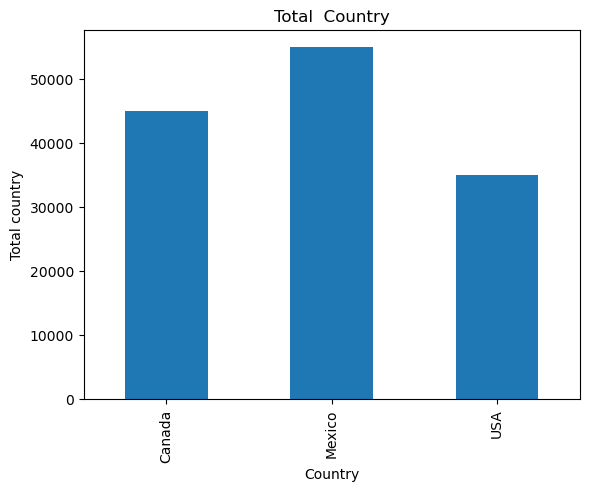

In [45]:
df.groupby('Country')['Sales'].sum().plot(kind='bar', title='Total  Country')
plt.ylabel('Total country')
plt.show()

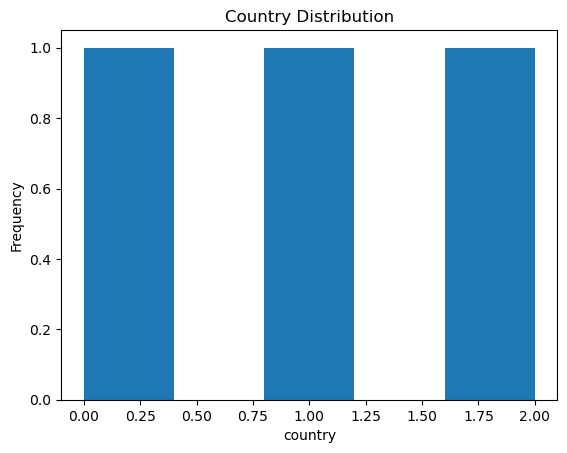

In [50]:
df['Category'].plot(kind='hist', bins=5, title='Country Distribution')
plt.xlabel('country')
plt.show()


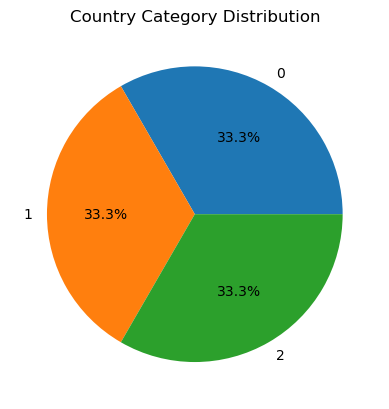

In [52]:
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Country Category Distribution')
plt.ylabel('')  # Remove the default y-label
plt.show()


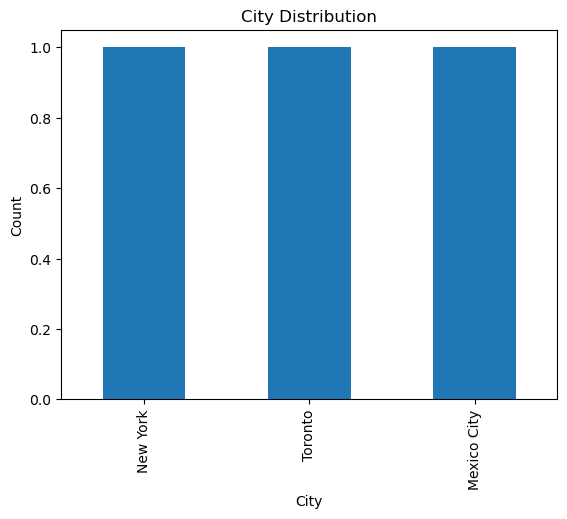

In [54]:
# Adding a 'City' column with sample data
df['City'] = ['New York', 'Toronto', 'Mexico City']

# Plotting the 'City' column
df['City'].value_counts().plot(kind="bar")
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='City'>

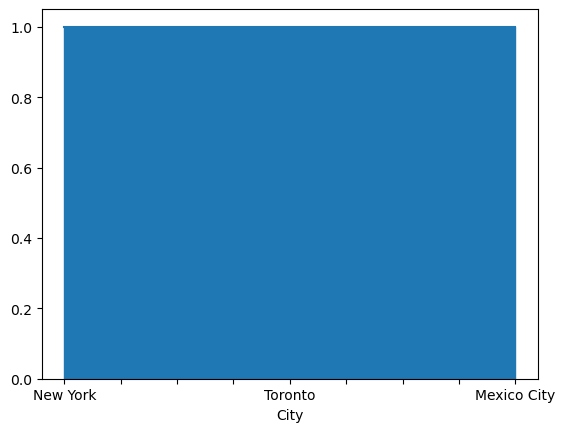

In [55]:
df['City'].value_counts().plot(kind="area")

<Axes: ylabel='Frequency'>

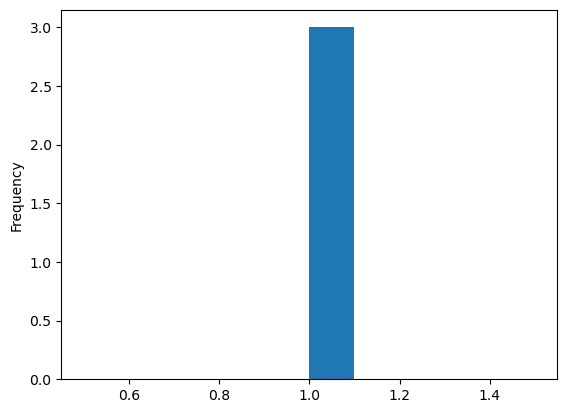

In [56]:
df['City'].value_counts().plot(kind="hist")

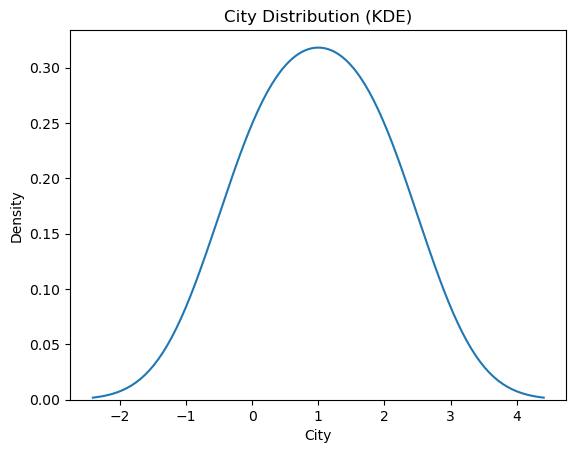

In [58]:
# Convert categorical 'City' column to numerical data
city_numeric = df['City'].factorize()[0]

# Plot KDE for the numerical data
sns.kdeplot(city_numeric)
plt.title('City Distribution (KDE)')
plt.xlabel('City')
plt.show()

<Axes: >

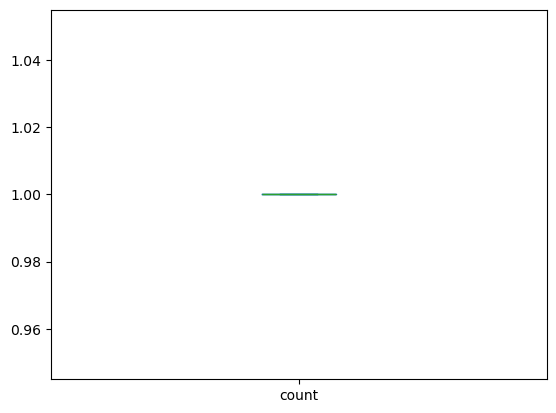

In [59]:
df['Country'].value_counts().plot(kind="box")

<Axes: xlabel='City'>

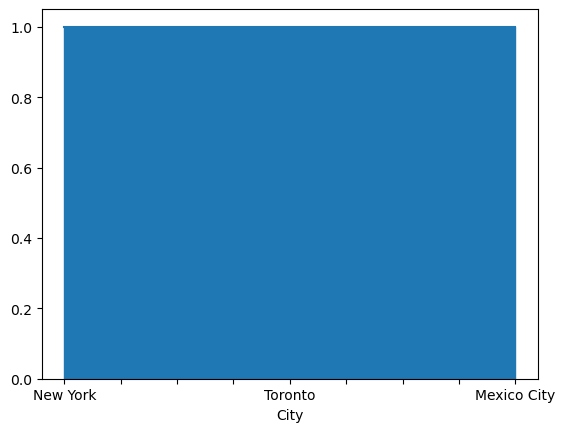

In [60]:
df['City'].value_counts().plot(kind="area")

## saving data

In [63]:
# Ensure the file is not open in any other program and you have the necessary permissions
try:
	df = pd.read_csv("data.csv")
	df
	df.to_excel("newdata.xlsx", sheet_name="newsheet")
except PermissionError as e:
	print(f"PermissionError: {e}")

PermissionError: [Errno 13] Permission denied: 'data.csv'
